## Attendance Problem

Lets see how we can use bayes to solve an actual problem

*I have a list of 7 events with attendance and registered people for each event, Can we guess what will be the attendance of the event given that the number of people registered are 100?*

so given the data of the 7 events we want to predict how many people will attend the 8th event given that there are 100 registrations.

In [25]:
%matplotlib inline

from thinkbayes2 import Suite
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import binom, beta
import thinkplot

In [26]:
# import the dataset
data = pd.read_csv('attendance.csv', index_col='Event')

In [29]:
data.head(7)

,attended,registered
Event,,
A,17,88
B,20,47
C,36,75
D,34,65
E,29,60
F,34,90
G,51,38


In [30]:
class AttendanceModel(Suite):
    def Likelihood(self, data, hypo):
        x = hypo / 100
        if data == 1:
            return x
        else:
            return 1 - x

### Beta Distributions

The beta distributions, is controlled by 2 shape parameters aplpha(a) and beta(b). Its generally used when we need to add more information to the prior. In our problem, lets say I have a prior belief that I am 60% sure that 40% people would attend the events, to add the information I assign alpha 4  and beta 6. So in other words alpha is controlling the position and beta is controlling the spread of the curve


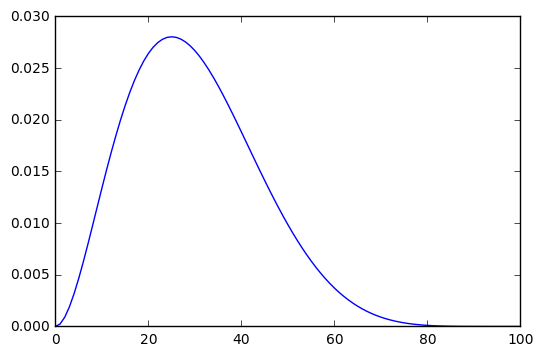

In [32]:
# Play around a bit with the beta distribution
plt.plot(beta.pdf(range(101), a=4, b=6, scale=100))

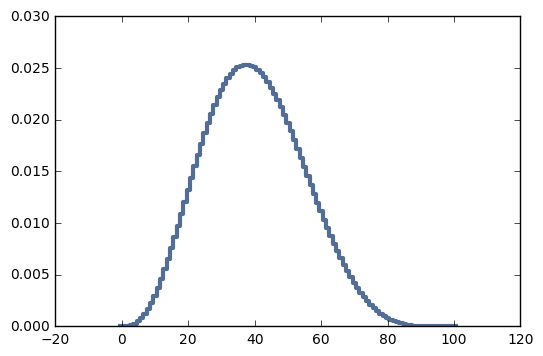

In [36]:
attendance = AttendanceModel(range(101))
# Feel free to change this to represent your own belief. 
prior = beta.pdf(range(101), a=4, b=6, loc=0, scale=100)
for index in range(101):
    attendance[index] = prior[index]
attendance.Normalize()
thinkplot.Pmf(attendance)

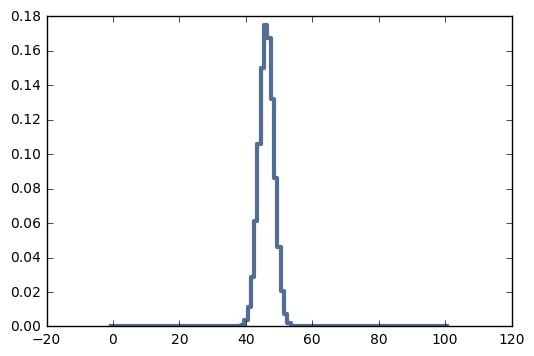

In [37]:
for attended, registered in zip(data.attended.tolist(), data.registered.tolist()):
    attendance.UpdateSet([1] * attended + [0] * (registered - attended))
attendance.Normalize()
thinkplot.Pmf(attendance)

In [41]:
# Discribe the posterior
attendance.Mean()

46.296296296296283

In [42]:
attendance.CredibleInterval(95)

(42, 51)

To predict the number of people who show up for the next event, we can generate a **predictive distribution** by drawing samples from the posterior that we just calculated, and then drawing samples from a Binomial distribution with parameters x and n, where n is the number of people who signed up and x is the probability of them showing up.

### Binomial Distribution

The binomial distribution is defined by 2 params *n* and *p*, where *n* is the number of trials and *p* is the probability of success. I want to predict the number of people coming to the event given that there are 110 registrations, thus
            
                n = 110

and *p* the probability of success in this term, probability of people coming can be generated by sampling 110 people and taking the mean of the sample as p

                p = Mean of Sample from our posterior from the attendance model

In [56]:
number_of_registered = 110
p = attendance.Sample(number_of_registered).mean() / 100

In [57]:
predictive_prior = binom(number_of_registered, p)

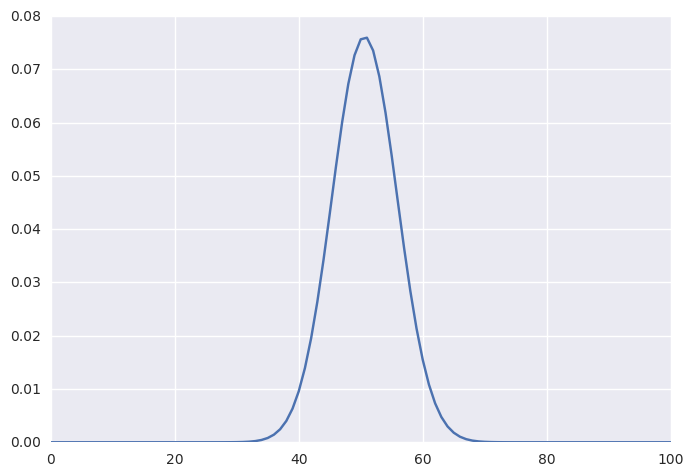

In [58]:
plt.plot(predictive_prior.pmf(range(101)))

In [59]:
'There will be around {0} to {1} people attending the event.'.format(*predictive_prior.interval(0.95))

'There will be around 40.0 to 61.0 people attending the event.'

### Solving the same problem in the frequentist paradigm, how should we approach ? 

Lets do a simple regression to compare our results and see the differences in the insights gained from the result.

In [60]:
from sklearn.linear_model import LinearRegression
import seaborn as sns

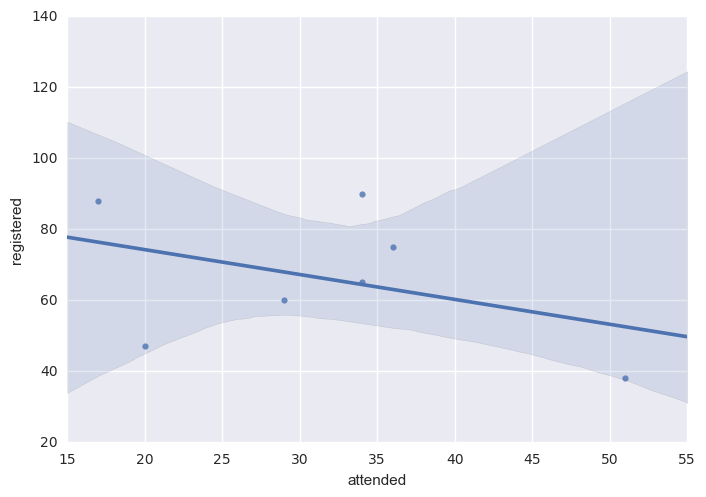

In [61]:
sns.regplot(data.attended, data.registered)

In [62]:
reg = LinearRegression()
reg.fit(X=data.registered.values.reshape(7,1), y=data.attended.values.reshape(7,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
reg.predict(100)

array([[ 23.79428044]])

Q: If you had to bet on the result, which one would you bet the range that we got above or the result from regression ?